Color at 0.7 percentile: #2D7DBB


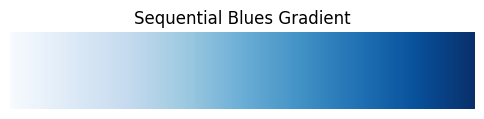

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Create a sequential blues colormap
cmap = plt.cm.get_cmap('Blues')

# Generate an array of values from 0 to 1
percentiles = np.linspace(0, 1, 101)  # 101 points for 0% to 100%

# Get the colors at the specified percentiles
colors = [cmap(p) for p in percentiles]

# Specify the percentile you're interested in
desired_percentile = 0.7

# Get the color code at the desired percentile
color_at_percentile = cmap(desired_percentile)

# Convert the color to its hexadecimal representation
hex_color = "#{:02X}{:02X}{:02X}".format(
    int(color_at_percentile[0] * 255),
    int(color_at_percentile[1] * 255),
    int(color_at_percentile[2] * 255)
)

print("Color at {} percentile: {}".format(desired_percentile, hex_color))

# Plot the colormap
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(figsize=(6, 1))
ax.set_title("Sequential Blues Gradient")
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()

plt.show()

In [24]:
cmap = plt.cm.get_cmap('Blues')
color_at_percentile = cmap(0.9)
color_at_percentile

(0.03137254901960784, 0.2897347174163783, 0.570319108035371, 1.0)

In [1]:
import networkx as nx

In [9]:
G = nx.barabasi_albert_graph(10, 5)
degree, closeness, betweenness, pagerank = [], [], [], []
for node in G_nodes(G):
    degree.append((node["id"], node["degree"]))
    
degree = sorted(degree, key=lambda x: x[1], reverse=True)
print(degree)
rank = 1
now_score = degree[0][1]
for idx, (node, score) in enumerate(degree): 
    if now_score > score:
        now_score = score
        rank += 1
    degree[idx] = (node, rank)

print(degree)


[(0, 9), (6, 7), (7, 7), (8, 6), (9, 5), (1, 4), (2, 4), (3, 4), (4, 3), (5, 1)]
[(0, 1), (6, 2), (7, 2), (8, 3), (9, 4), (1, 5), (2, 5), (3, 5), (4, 6), (5, 7)]


In [10]:
import networkx as nx

In [24]:
def read_911(full):
    if full:
        filename = "../sample_data/full_911.json"
    else:
        filename = "../sample_data/911.json"
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)
    # if full:
    #     G = nx.read_gml("../sample_data/full_911.gml")
    # else:
    #     G = nx.read_gml("../sample_data/911.gml")
    # map_dct = {
    #     node: idx + 2 for idx, node in enumerate(G.nodes())
    # }
    # return nx.relabel_nodes(G, map_dct, copy=True)


    

In [25]:
G = read_911(full=True)
for n in list(G.nodes(data=True)):
    print(n)

(2, {'x': -41.17104962197133, 'y': 158.7940031223639})
(3, {'x': -44.27913428237458, 'y': 123.8615446341073})
(4, {'x': -71.57367276404749, 'y': 105.63303522467284})
(5, {'x': -51.54004454906489, 'y': 74.58684967840891})
(6, {'x': -33.37102622970434, 'y': 102.35657241068775})
(7, {'x': -39.33199443361863, 'y': 41.6090903594721})
(8, {'x': -67.15828653282095, 'y': 40.20165010701012})
(9, {'x': -57.09982434742826, 'y': 10.003191577128767})
(10, {'x': -86.2911481239602, 'y': -9.753525740617414})
(11, {'x': -18.938010249734962, 'y': 19.678146359804742})
(12, {'x': -25.899646366813727, 'y': -22.83418483742718})
(13, {'x': 40.20906906134594, 'y': 14.738043217236475})
(14, {'x': 23.164385686324774, 'y': -31.18047043914663})
(15, {'x': 66.71992389358364, 'y': -17.11737057781595})
(16, {'x': 86.44420195361722, 'y': 12.210534229965639})
(17, {'x': 112.09099361402026, 'y': -21.639456098778712})
(18, {'x': 145.66541053955459, 'y': -57.58581992347274})
(19, {'x': 143.52033354744106, 'y': -94.787983

In [5]:
def G_nodes(G):

    degree = {node: degree for (node, degree) in G.degree()}
    closeness = {node: closeness for (node, closeness) in nx.closeness_centrality(G).items()}
    betweenness = {node: betweenness for (node, betweenness) in nx.betweenness_centrality(G).items()}
    pagerank = {node: pagerank for (node, pagerank) in nx.pagerank(G).items()}

    nodes = []
    for n in list(G.nodes()):
        nodes.append({
            "id": n, "degree": round(degree[n], 2), "closeness": round(closeness[n], 2), "betweenness": round(betweenness[n], 2), "pagerank": round(pagerank[n], 2), "display": "True",
        })

    # add a pesudo node as center node
    if len(list(nx.connected_components(G))) > 1:
        nodes.append({
            "id": -1, "degree": -1, "closeness": -1, "betweenness": -1, "pagerank": -1, "display": "False"
        })

    return nodes

In [38]:
import json
null = ""
data = {"nodes":[{"id":1,"degree":1,"closeness":0.27,"betweenness":0,"pagerank":0.04,"display":"True","__indexColor":"#ec0001","index":0,"x":-22.87914668859958,"y":-128.99978548981125,"vx":-6.309841031104053e-10,"vy":-4.17161852438107e-11},{"id":2,"degree":1,"closeness":0.27,"betweenness":0,"pagerank":0.04,"display":"True","__indexColor":"#d80002","index":1,"x":-0.3722615559706348,"y":-107.79114473689,"vx":-2.6518829725248875e-10,"vy":-5.014509783814697e-10},{"id":3,"degree":4,"closeness":0.36,"betweenness":0.45,"pagerank":0.16,"display":"True","__indexColor":"#c40003","index":2,"x":-31.817846126124017,"y":-95.69035699786535,"vx":-3.550194848366123e-11,"vy":1.227644666040869e-10},{"id":4,"degree":1,"closeness":0.31,"betweenness":0,"pagerank":0.04,"display":"True","__indexColor":"#b00004","index":3,"x":-64.51829703341393,"y":-51.093492438464935,"vx":-1.8996347874009265e-10,"vy":-1.282725575855494e-10},{"id":5,"degree":3,"closeness":0.43,"betweenness":0.59,"pagerank":0.11,"display":"True","__indexColor":"#9c0005","index":4,"x":-31.393680721924664,"y":-48.82189793403867,"vx":-2.3540938079207894e-10,"vy":1.5369126659800783e-10},{"id":6,"degree":3,"closeness":0.44,"betweenness":0.55,"pagerank":0.09,"display":"True","__indexColor":"#880006","index":5,"x":-27.749716648094473,"y":1.89108847297105,"vx":-7.249182842865409e-10,"vy":2.2757652488676586e-10},{"id":7,"degree":3,"closeness":0.38,"betweenness":0.11,"pagerank":0.09,"display":"True","__indexColor":"#740007","index":6,"x":-6.67462539835533,"y":36.08468833248006,"vx":-2.4422915278818574e-10,"vy":-5.585730037211824e-10},{"id":8,"degree":3,"closeness":0.4,"betweenness":0.34,"pagerank":0.09,"display":"True","__indexColor":"#600008","index":7,"x":-39.650988691140554,"y":46.20884781779639,"vx":9.248676541228076e-11,"vy":8.728702830156781e-10},{"id":9,"degree":2,"closeness":0.32,"betweenness":0.02,"pagerank":0.07,"display":"True","__indexColor":"#4c0009","index":8,"x":3.6945215863348357,"y":70.5283362448923,"vx":-2.1594874500695833e-10,"vy":-6.399999956197066e-10},{"id":10,"degree":3,"closeness":0.34,"betweenness":0.31,"pagerank":0.1,"display":"True","__indexColor":"#38000a","index":9,"x":-23.649933571913994,"y":88.3275146951276,"vx":1.205301955085091e-10,"vy":1.2040492810619523e-9},{"id":11,"degree":2,"closeness":0.27,"betweenness":0.17,"pagerank":0.08,"display":"True","__indexColor":"#24000b","index":10,"x":16.5371365289043,"y":99.2722316849504,"vx":-1.0123649903413945e-9,"vy":2.9098229336505203e-9},{"id":12,"degree":1,"closeness":0.22,"betweenness":0,"pagerank":0.04,"display":"True","__indexColor":"#10000c","index":11,"x":51.21999299476398,"y":93.06281511452546,"vx":-1.0130727850530051e-9,"vy":3.4141626384173966e-9},{"id":13,"degree":1,"closeness":0.27,"betweenness":0,"pagerank":0.04,"display":"True","__indexColor":"#fc000d","index":12,"x":-54.19218207970927,"y":-121.73151784533314,"vx":-1.6933127753730238e-10,"vy":2.423531658020388e-10}],"links":[{"source":{"id":1,"degree":1,"closeness":0.27,"betweenness":0,"pagerank":0.04,"display":"True","__indexColor":"#ec0001","index":0,"x":-22.87914668859958,"y":-128.99978548981125,"vx":-6.309841031104053e-10,"vy":-4.17161852438107e-11},"target":{"id":3,"degree":4,"closeness":0.36,"betweenness":0.45,"pagerank":0.16,"display":"True","__indexColor":"#c40003","index":2,"x":-31.817846126124017,"y":-95.69035699786535,"vx":-3.550194848366123e-11,"vy":1.227644666040869e-10},"dashed":"False","display":"True","__indexColor":"#e8000e","__controlPoints":null,"index":0},{"source":{"id":2,"degree":1,"closeness":0.27,"betweenness":0,"pagerank":0.04,"display":"True","__indexColor":"#d80002","index":1,"x":-0.3722615559706348,"y":-107.79114473689,"vx":-2.6518829725248875e-10,"vy":-5.014509783814697e-10},"target":{"id":3,"degree":4,"closeness":0.36,"betweenness":0.45,"pagerank":0.16,"display":"True","__indexColor":"#c40003","index":2,"x":-31.817846126124017,"y":-95.69035699786535,"vx":-3.550194848366123e-11,"vy":1.227644666040869e-10},"dashed":"False","display":"True","__indexColor":"#d4000f","__controlPoints":null,"index":1},{"source":{"id":3,"degree":4,"closeness":0.36,"betweenness":0.45,"pagerank":0.16,"display":"True","__indexColor":"#c40003","index":2,"x":-31.817846126124017,"y":-95.69035699786535,"vx":-3.550194848366123e-11,"vy":1.227644666040869e-10},"target":{"id":13,"degree":1,"closeness":0.27,"betweenness":0,"pagerank":0.04,"display":"True","__indexColor":"#fc000d","index":12,"x":-54.19218207970927,"y":-121.73151784533314,"vx":-1.6933127753730238e-10,"vy":2.423531658020388e-10},"dashed":"False","display":"True","__indexColor":"#c00010","__controlPoints":null,"index":2},{"source":{"id":3,"degree":4,"closeness":0.36,"betweenness":0.45,"pagerank":0.16,"display":"True","__indexColor":"#c40003","index":2,"x":-31.817846126124017,"y":-95.69035699786535,"vx":-3.550194848366123e-11,"vy":1.227644666040869e-10},"target":{"id":5,"degree":3,"closeness":0.43,"betweenness":0.59,"pagerank":0.11,"display":"True","__indexColor":"#9c0005","index":4,"x":-31.393680721924664,"y":-48.82189793403867,"vx":-2.3540938079207894e-10,"vy":1.5369126659800783e-10},"dashed":"False","display":"True","__indexColor":"#ac0011","__controlPoints":null,"index":3},{"source":{"id":4,"degree":1,"closeness":0.31,"betweenness":0,"pagerank":0.04,"display":"True","__indexColor":"#b00004","index":3,"x":-64.51829703341393,"y":-51.093492438464935,"vx":-1.8996347874009265e-10,"vy":-1.282725575855494e-10},"target":{"id":5,"degree":3,"closeness":0.43,"betweenness":0.59,"pagerank":0.11,"display":"True","__indexColor":"#9c0005","index":4,"x":-31.393680721924664,"y":-48.82189793403867,"vx":-2.3540938079207894e-10,"vy":1.5369126659800783e-10},"dashed":"False","display":"True","__indexColor":"#980012","__controlPoints":null,"index":4},{"source":{"id":5,"degree":3,"closeness":0.43,"betweenness":0.59,"pagerank":0.11,"display":"True","__indexColor":"#9c0005","index":4,"x":-31.393680721924664,"y":-48.82189793403867,"vx":-2.3540938079207894e-10,"vy":1.5369126659800783e-10},"target":{"id":6,"degree":3,"closeness":0.44,"betweenness":0.55,"pagerank":0.09,"display":"True","__indexColor":"#880006","index":5,"x":-27.749716648094473,"y":1.89108847297105,"vx":-7.249182842865409e-10,"vy":2.2757652488676586e-10},"dashed":"False","display":"True","__indexColor":"#840013","__controlPoints":null,"index":5},{"source":{"id":6,"degree":3,"closeness":0.44,"betweenness":0.55,"pagerank":0.09,"display":"True","__indexColor":"#880006","index":5,"x":-27.749716648094473,"y":1.89108847297105,"vx":-7.249182842865409e-10,"vy":2.2757652488676586e-10},"target":{"id":7,"degree":3,"closeness":0.38,"betweenness":0.11,"pagerank":0.09,"display":"True","__indexColor":"#740007","index":6,"x":-6.67462539835533,"y":36.08468833248006,"vx":-2.4422915278818574e-10,"vy":-5.585730037211824e-10},"dashed":"False","display":"True","__indexColor":"#700014","__controlPoints":null,"index":6},{"source":{"id":6,"degree":3,"closeness":0.44,"betweenness":0.55,"pagerank":0.09,"display":"True","__indexColor":"#880006","index":5,"x":-27.749716648094473,"y":1.89108847297105,"vx":-7.249182842865409e-10,"vy":2.2757652488676586e-10},"target":{"id":8,"degree":3,"closeness":0.4,"betweenness":0.34,"pagerank":0.09,"display":"True","__indexColor":"#600008","index":7,"x":-39.650988691140554,"y":46.20884781779639,"vx":9.248676541228076e-11,"vy":8.728702830156781e-10},"dashed":"False","display":"True","__indexColor":"#5c0015","__controlPoints":null,"index":7},{"source":{"id":7,"degree":3,"closeness":0.38,"betweenness":0.11,"pagerank":0.09,"display":"True","__indexColor":"#740007","index":6,"x":-6.67462539835533,"y":36.08468833248006,"vx":-2.4422915278818574e-10,"vy":-5.585730037211824e-10},"target":{"id":8,"degree":3,"closeness":0.4,"betweenness":0.34,"pagerank":0.09,"display":"True","__indexColor":"#600008","index":7,"x":-39.650988691140554,"y":46.20884781779639,"vx":9.248676541228076e-11,"vy":8.728702830156781e-10},"dashed":"False","display":"True","__indexColor":"#480016","__controlPoints":null,"index":8},{"source":{"id":7,"degree":3,"closeness":0.38,"betweenness":0.11,"pagerank":0.09,"display":"True","__indexColor":"#740007","index":6,"x":-6.67462539835533,"y":36.08468833248006,"vx":-2.4422915278818574e-10,"vy":-5.585730037211824e-10},"target":{"id":9,"degree":2,"closeness":0.32,"betweenness":0.02,"pagerank":0.07,"display":"True","__indexColor":"#4c0009","index":8,"x":3.6945215863348357,"y":70.5283362448923,"vx":-2.1594874500695833e-10,"vy":-6.399999956197066e-10},"dashed":"False","display":"True","__indexColor":"#340017","__controlPoints":null,"index":9},{"source":{"id":8,"degree":3,"closeness":0.4,"betweenness":0.34,"pagerank":0.09,"display":"True","__indexColor":"#600008","index":7,"x":-39.650988691140554,"y":46.20884781779639,"vx":9.248676541228076e-11,"vy":8.728702830156781e-10},"target":{"id":10,"degree":3,"closeness":0.34,"betweenness":0.31,"pagerank":0.1,"display":"True","__indexColor":"#38000a","index":9,"x":-23.649933571913994,"y":88.3275146951276,"vx":1.205301955085091e-10,"vy":1.2040492810619523e-9},"dashed":"False","display":"True","__indexColor":"#200018","__controlPoints":null,"index":10},{"source":{"id":9,"degree":2,"closeness":0.32,"betweenness":0.02,"pagerank":0.07,"display":"True","__indexColor":"#4c0009","index":8,"x":3.6945215863348357,"y":70.5283362448923,"vx":-2.1594874500695833e-10,"vy":-6.399999956197066e-10},"target":{"id":10,"degree":3,"closeness":0.34,"betweenness":0.31,"pagerank":0.1,"display":"True","__indexColor":"#38000a","index":9,"x":-23.649933571913994,"y":88.3275146951276,"vx":1.205301955085091e-10,"vy":1.2040492810619523e-9},"dashed":"False","display":"True","__indexColor":"#0c0019","__controlPoints":null,"index":11},{"source":{"id":10,"degree":3,"closeness":0.34,"betweenness":0.31,"pagerank":0.1,"display":"True","__indexColor":"#38000a","index":9,"x":-23.649933571913994,"y":88.3275146951276,"vx":1.205301955085091e-10,"vy":1.2040492810619523e-9},"target":{"id":11,"degree":2,"closeness":0.27,"betweenness":0.17,"pagerank":0.08,"display":"True","__indexColor":"#24000b","index":10,"x":16.5371365289043,"y":99.2722316849504,"vx":-1.0123649903413945e-9,"vy":2.9098229336505203e-9},"dashed":"False","display":"True","__indexColor":"#f8001a","__controlPoints":null,"index":12},{"source":{"id":11,"degree":2,"closeness":0.27,"betweenness":0.17,"pagerank":0.08,"display":"True","__indexColor":"#24000b","index":10,"x":16.5371365289043,"y":99.2722316849504,"vx":-1.0123649903413945e-9,"vy":2.9098229336505203e-9},"target":{"id":12,"degree":1,"closeness":0.22,"betweenness":0,"pagerank":0.04,"display":"True","__indexColor":"#10000c","index":11,"x":51.21999299476398,"y":93.06281511452546,"vx":-1.0130727850530051e-9,"vy":3.4141626384173966e-9},"dashed":"False","display":"True","__indexColor":"#e4001b","__controlPoints":null,"index":13}]}

dct = {"nodes": [], "links": []}
for node in data["nodes"]:
    node_dct = {"id": node["id"], "x": node["x"], "y": node["y"]}
    dct["nodes"].append(node_dct)

for edge in data["links"]:
    edge_dct = {"source": edge["source"]["id"], "target": edge["target"]["id"]}
    dct["links"].append(edge_dct)
json.dumps(dct)

'{"nodes": [{"id": 1, "x": -22.87914668859958, "y": -128.99978548981125}, {"id": 2, "x": -0.3722615559706348, "y": -107.79114473689}, {"id": 3, "x": -31.817846126124017, "y": -95.69035699786535}, {"id": 4, "x": -64.51829703341393, "y": -51.093492438464935}, {"id": 5, "x": -31.393680721924664, "y": -48.82189793403867}, {"id": 6, "x": -27.749716648094473, "y": 1.89108847297105}, {"id": 7, "x": -6.67462539835533, "y": 36.08468833248006}, {"id": 8, "x": -39.650988691140554, "y": 46.20884781779639}, {"id": 9, "x": 3.6945215863348357, "y": 70.5283362448923}, {"id": 10, "x": -23.649933571913994, "y": 88.3275146951276}, {"id": 11, "x": 16.5371365289043, "y": 99.2722316849504}, {"id": 12, "x": 51.21999299476398, "y": 93.06281511452546}, {"id": 13, "x": -54.19218207970927, "y": -121.73151784533314}], "edges": [{"source": 1, "target": 3}, {"source": 2, "target": 3}, {"source": 3, "target": 13}, {"source": 3, "target": 5}, {"source": 4, "target": 5}, {"source": 5, "target": 6}, {"source": 6, "targ

In [39]:
with open("test.json", "w") as json_file:
    json.dump(dct, json_file, indent=4)